In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Linear Regression Part 2

* What's we'll cover
  * Predicting Values
  * Linear regression for categorical explanaroty vairables
  * Linear regression for non-linear data
    * Transforming variables
  * Logistic Regression




In [152]:
# Data obtained here: https://www.kaggle.com/aungpyaeap/fish-market

fish_data = read_csv("./data/fish_info.csv")
head(fish_data)

Parsed with column specification:
cols(
  Species = col_character(),
  Weight = col_double(),
  Length = col_double(),
  Height = col_double(),
  Width = col_double()
)



Species,Weight,Length,Height,Width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Bream,242,23.2,11.5200,4.0200
Bream,290,24.0,12.4800,4.3056
Bream,340,23.9,12.3778,4.6961
Bream,363,26.3,12.7300,4.4555
Bream,430,26.5,12.4440,5.1340
Bream,450,26.8,13.6024,4.9274


### Usign `dplyr`'s' `filter`

* `dplyr` provides some very useful function to wrangle data.
* `filer` is a useful function to subset data
  * take a condition on which to filter
    * Condition should evaluate to True or False
  * Return a line if its conditin evaluates to True
* For example:

```R
fish_data %>% filter(Species== "Bream")
```
* Note the `conditional` operator `==`, which tests for equality

In [136]:
fish_data %>% filter(Length > 50)

Species,Weight,Length,Height,Width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Pike,1250,52,10.6863,6.9849
Pike,1600,56,9.6000,6.1440
Pike,1550,56,9.6000,6.1440
Pike,1650,59,10.8120,7.4800


In [109]:
fish_data %>% filter(Species== "Bream")

Species,Weight,Length,Height,Width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Bream,242,23.2,11.5200,4.0200
Bream,290,24.0,12.4800,4.3056
Bream,340,23.9,12.3778,4.6961
Bream,363,26.3,12.7300,4.4555
Bream,430,26.5,12.4440,5.1340
Bream,450,26.8,13.6024,4.9274
Bream,500,26.8,14.1795,5.2785
Bream,390,27.6,12.6700,4.6900
Bream,450,27.6,14.0049,4.8438


In [122]:
Bream_weight = fish_data %>% filter(Species== "Bream")
lm_weight_breamer = lm(Weight ~ Length, Bream_weight)
lm_weight


Call:
lm(formula = Weight ~ Length, data = Bream_weight)

Coefficients:
(Intercept)       Length  
   -1035.35        54.55  


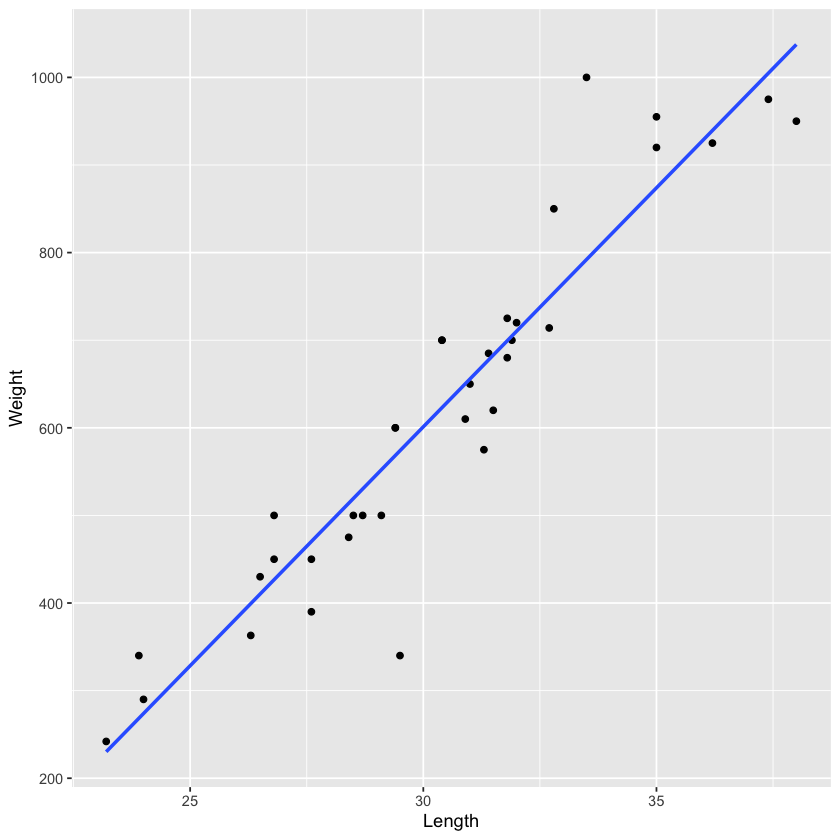

In [117]:
ggplot(Bream_weight, aes(x=Length, y=Weight))+
  geom_point() + 
  geom_smooth(formula = y ~ x,method="lm", se=FALSE) 
  

In [128]:
new_weight_data = tibble(Length= seq(20,40, 5))
new_weight_data 

Length
<dbl>
20
25
30
35
40


In [142]:
predictions = predict(lm_weight_breamer, new_weight_data)
predictions

1          2          3          4          5 
  55.65205  328.40196  601.15186  873.90177 1146.65167

In [144]:
cbind(new_weight_data, Weight=predictions)

,Length,Weight
,<dbl>,<dbl>
1,20,55.65205
2,25,328.40196
3,30,601.15186
4,35,873.90177
5,40,1146.65167


In [145]:
prediction_data = cbind(new_weight_data, Weight=predictions)
prediction_data 

,Length,Weight
,<dbl>,<dbl>
1,20,55.65205
2,25,328.40196
3,30,601.15186
4,35,873.90177
5,40,1146.65167


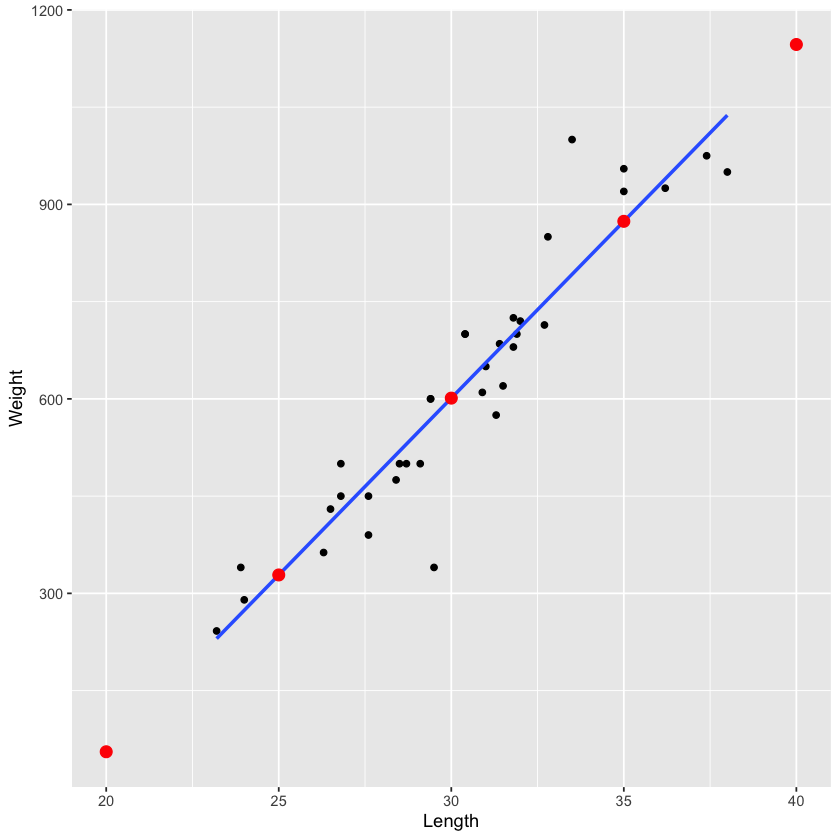

In [150]:
ggplot(Bream_weight, aes(x=Length, y=Weight))+
  geom_point() + 
  geom_smooth(formula = y ~ x,method="lm", se=FALSE) + 
  geom_point(data=prediction_data, color="red", size = 3)
# note the aes will be inherited by all layouts so no need to include it gain.  

### Why did we subset the data?



* Why not models the complete dataset? 

```R 
lm(Weight~ Length, fish_data)
```

In [183]:
erroneous_lm = lm(Weight~ Length, fish_data)
summary(erroneous_lm)
# notice that R-squared and the p-value are significantant. Does it mean that the model is good?


Call:
lm(formula = Weight ~ Length, data = fish_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-414.90  -71.26    6.08   98.31  363.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -462.375     32.243  -14.34   <2e-16 ***
Length        32.792      1.148   28.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 144.3 on 157 degrees of freedom
Multiple R-squared:  0.8385,	Adjusted R-squared:  0.8375 
F-statistic: 815.3 on 1 and 157 DF,  p-value: < 2.2e-16


### Why did we subset the data?



* The data contains three populations
  * Bream, Pike and Smelt
* Three varianances, therefore data will exhibit heteroscedasticity, which vialates one of the conditions of linear regression



In [161]:
sd((fish_data %>% filter(Species== "Bream"))$Length)

sd((fish_data %>% filter(Species== "Pike"))$Length)

sd((fish_data %>% filter(Species== "Smelt"))$Length)

[1] 3.593699

[1] 9.029087

[1] 1.216372

### Inspecting the Residuals

* Note that the residuals summary does not point uniformly distributed residuals

```
Residuals:
    Min      1Q  Median      3Q     Max 
-414.90  -71.26    6.08   98.31  363.84 
```

In [184]:
# residulas of all the points in the dataset
residuals(erroneous_lm)

1           2           3           4           5           6 
 -56.403123  -34.636854   18.642362  -37.058831   23.382736   33.545087 
          7           8           9          10          11          12 
  83.545087  -52.688644    7.311356   27.798408    6.077625   21.239975 
         13          14          15          16          17          18 
   8.123110 -164.993756   98.285461   98.285461  165.493297  165.493297 
         19          20          21          22          23          24 
  59.097215   95.817998   10.980349  117.701133   49.421916   99.584267 
         25          26          27          28          29          30 
 116.305051  144.584267  133.025834  104.071320  236.792103  363.837589 
         31          32          33          34          35          36 
 234.649343  269.649343  200.298746  210.948149  166.272851   79.356165 
         37          38          39          40          41          42 
  -9.695625  -33.487789  -47.442304  -27.559169 -160.676035  -53.955251 
         43          44          45          46          47          48 
 -53.792900  -56.585064  -64.864281  -49.864281  -86.260363  -69.539579 
         49          50          51          52          53          54 
 -90.052527  -98.052527  -62.331743 -131.519989  -34.636854  -85.429018 
         55          56          57          58          59          60 
-114.993756  -41.519989  -57.916071  -71.104317   67.798408  157.279156 
         61          62          63          64          65          66 
 239.227366   74.680867   53.447135   17.862808    8.512211    8.999263 
         67          68          69          70          71          72 
 -20.676035    9.323965  -41.909766  -32.818795  -18.844690  -24.636854 
         73          74          75          76          77          78 
 222.333850   84.473030   49.843217   21.992621   17.538106   31.142024 
         79          80          81          82          83          84 
 -10.533274  -21.650140  -36.325438  -49.442304  -50.676035  -45.676035 
         85          86          87          88          89          90 
 -35.676035  -40.513684  -73.468199  -73.468199  -63.468199  -58.468199 
         91          92          93          94          95          96 
 -83.468199  -79.864281  -59.864281  -71.422713  -76.260363  -72.656445 
         97          98          99         100         101         102 
 -34.052527 -114.052527  -90.727825 -111.844690 -111.240772 -139.429018 
        103         104         105         106         107         108 
 -63.987451 -110.545884 -105.545884 -120.545884 -136.941966 -119.734130 
        109         110         111         112         113         114 
-129.247077  -23.785920  -30.974166  236.629753   32.441507   47.441507 
        115         116         117         118         119         120 
  31.045425   17.766208  165.461097  -84.538903   82.181881  102.344231 
        121         122         123         124         125         126 
 149.065015  264.065015   65.785799  283.480687  157.246956  247.409307 
        127         128         129         130         131         132 
 144.130091  114.617143 -321.389838 -277.136516 -309.928680 -378.792224 
        133         134         135         136         137         138 
-271.746739 -373.142821 -393.311477 -339.311477 -312.590693 -414.895804 
        139         140         141         142         143         144 
-387.246401 -236.713863 -171.486437    7.182557  226.013901  176.013901 
        145         146         147         148         149         150 
 177.637409  164.107955  141.953440  138.174224  131.036575  121.298925 
        151         152         153         154         155         156 
 116.919709  101.823627  101.723627   98.344411   97.465194   92.106762 
        157         158         159 
  77.789896   49.218516   29.743217

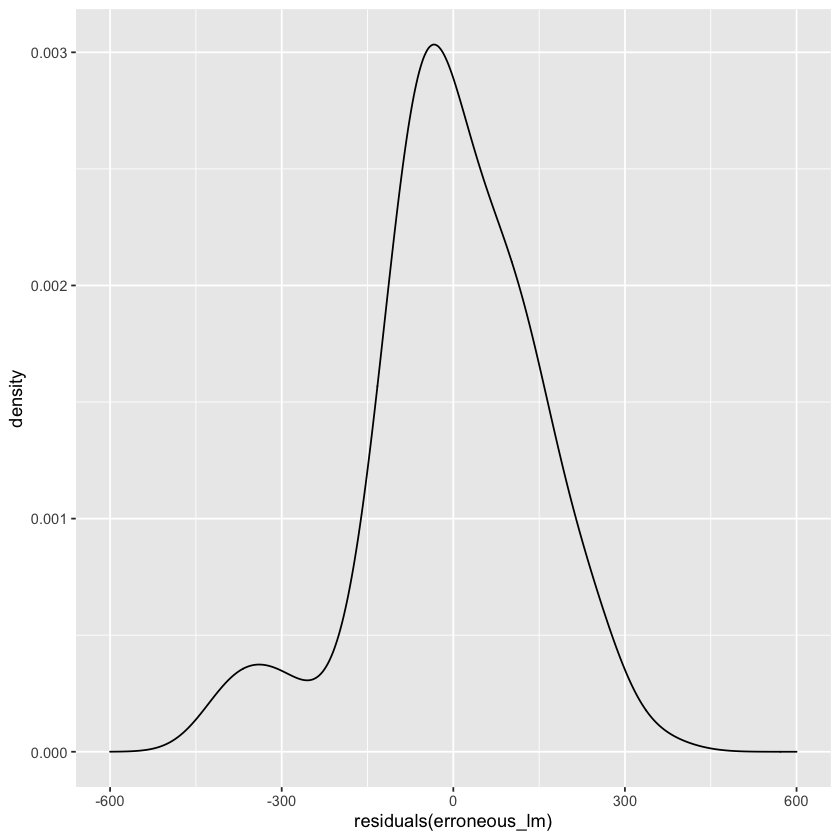

In [182]:
ggplot()+
   geom_density(aes(x=residuals(erroneous_lm)), bw=55) +
   xlim(-600, 600)


### Why did we Subset the Data?

* If you suspect that you data contains populations, then using a linear regression without accounting for the population structure is poor idea
  * Add the population (here Species) as an explanatory variable would adjust for the the observed differences.
  * How we do include the species, or any other categorical variable in our Model?



### Modeling with Categorical Variables
* Also called qualitative variables 
  * Represent a collection of two or more categories
* The values are not readily useable in a regression
  * even when the categorical encoding in numeric


### Encoding of a Categorical Variable in R: Factors

* Factors are used to represent categorical data. 
  * Factors in R are integers but provide special behavior
  * Not equivalent to an integer encoding

* The factor's values are called levels


In [5]:
sex  = c("male", "female", "female", "male")
weight = c(12.2, 9.5, 11.1, 14)
data = tibble(sex, weight)
data


sex,weight
<chr>,<dbl>
male,12.2
female,9.5
female,11.1
male,14.0


In [6]:
sex  = factor(c("male", "female", "female", "male"))
weight = c(12.2, 9.5, 11.1, 14)
data = tibble(sex, weight)
data


sex,weight
<fct>,<dbl>
male,12.2
female,9.5
female,11.1
male,14.0


In [7]:
levels(data$sex)

[1] "female" "male"

In [8]:
nlevels(data$sex)

[1] 2

In [16]:
nlevels(data$sex)

[1] 2

In [32]:
?read_tsv

In [34]:
weights_data = read_tsv(
                        "data/weights.tsv",
                        col_types = cols("sex" = col_factor(),"weight" = col_double())
                       )


weights_data

sex,weight
<fct>,<dbl>
male,17.8
female,13.2
female,15.8
male,17.3
female,10.2
female,12.1
female,10.8
male,15.9
male,15.2


In [35]:
# this will work even if sex is not a factor
# R will coerce it into a factor for the purpose
# of this operation
lm(weight~sex, weights_data)


Call:
lm(formula = weight ~ sex, data = weights_data)

Coefficients:
(Intercept)    sexfemale  
     16.513       -3.857  


### Interpretation in Simple linear Regression

* Recall that in the absence of any othe explanatory variable, the mean is the best predictor 

* Here, model the weight as a function of the explanatory variable by taking the mean for each category
    
* we'll follow the long route to gener



In [56]:
weights_data[weights_data$sex == "male", ]

sex,weight
<fct>,<dbl>
male,17.8
male,17.3
male,15.9
male,15.2
male,16.4
male,15.7
male,15.5
male,18.3


In [57]:
weights_data[weights_data$sex == "male", ]$weight

[1] 17.8 17.3 15.9 15.2 16.4 15.7 15.5 18.3

In [58]:
mean(weights_data[weights_data$sex == "male", ]$weight)

[1] 16.5125

In [59]:
mean(weights_data[weights_data$sex == "female", ]$weight)

[1] 12.65556

In [67]:
# Another approach using Filter
male_data = weights_data %>% filter(sex == "male")
mean(male_data$weight)

[1] 16.5125

In [68]:
female_data = weights_data %>% filter(sex == "female")
mean(female_data$weight)

[1] 12.65556

In [64]:
weights_data %>% filter(weight > 17 )

sex,weight
<fct>,<dbl>
male,17.8
male,17.3
male,18.3


### Usign `dplyr`'s' `group_by `

* `group_by` is a useful function to group data based on a factor's levels
  * Takes one of more `factor` columns on which to group
  * Results in a group_by tibble where operation can be applied to each group
  * Note that printing the tibble does not show anything different
* For example:

```R
weights_data %>% group_by(sex)
```
* Note the `conditional` operator `==`, which tests for equality

In [71]:
weights_data %>% group_by(sex)

sex,weight
<fct>,<dbl>
male,17.8
female,13.2
female,15.8
male,17.3
female,10.2
female,12.1
female,10.8
male,15.9
male,15.2


In [74]:
group_rows = weights_data %>% group_by(sex) %>% group_rows
print(group_rows)

<list_of<integer>[2]>
[[1]]
[1]  1  4  8  9 10 13 14 15

[[2]]
[1]  2  3  5  6  7 11 12 16 17



### Usign `dplyr`'s' `summarize` 

* `summarize` is a useful function that can take a function as input and use it to summarize a group of group_by tibble
    
* For example:

```R
weights_data %>% group_by(sex) %>% summarize(head(weight, 2), .groups='keep')
```

* the `.groups = 'keep'` is not required. It's used to avoid an annoying warning that informs the users that the groups were dropped.

In [79]:
weights_data %>% group_by(sex) %>% summarize(head(weight, 2), .groups='keep')

sex,"head(weight, 2)"
<fct>,<dbl>
male,17.8
male,17.3
female,13.2
female,15.8


In [80]:
weights_data %>% group_by(sex) %>% summarize(head(mean, 2), .groups='keep')

sex,"head(mean, 2)"
<fct>,<noquote>
male,"function (x, ...)"
male,"UseMethod(""mean"")"
female,"function (x, ...)"
female,"UseMethod(""mean"")"


In [53]:
weights_data %>% group_by(sex) %>% summarize(mean_weight = mean(weight),  .groups="keep")

sex,mean_weight
<fct>,<dbl>
male,16.51250
female,12.65556


### Rewriting the Equation without the Intercept

* Avoid negative values using the following notation

```R
lm(weight ~ sex + 0 , weights_data)
```

In [36]:
lm(weight ~ sex + 0 , weights_data)


Call:
lm(formula = weight ~ sex + 0, data = weights_data)

Coefficients:
  sexmale  sexfemale  
    16.51      12.66  


### Using Categorical variables in Regression

* what does it mean to use a categorical variable in a regression

* The following explanation not longer appplication

$$
weight = intercept + slope * sex
$$

* Instead the following interpretation is used

$$
weight = lvl\_1\_status * \mu_{lvl\_1} + lvl\_2\_status * \mu_{lvl\_2} + \ldots
$$

Where $lvl\_i\_status$ is either 0 or 1.





